Displaying Images: 100%|██████████| 20/20 [00:00<00:00, 161.83it/s]


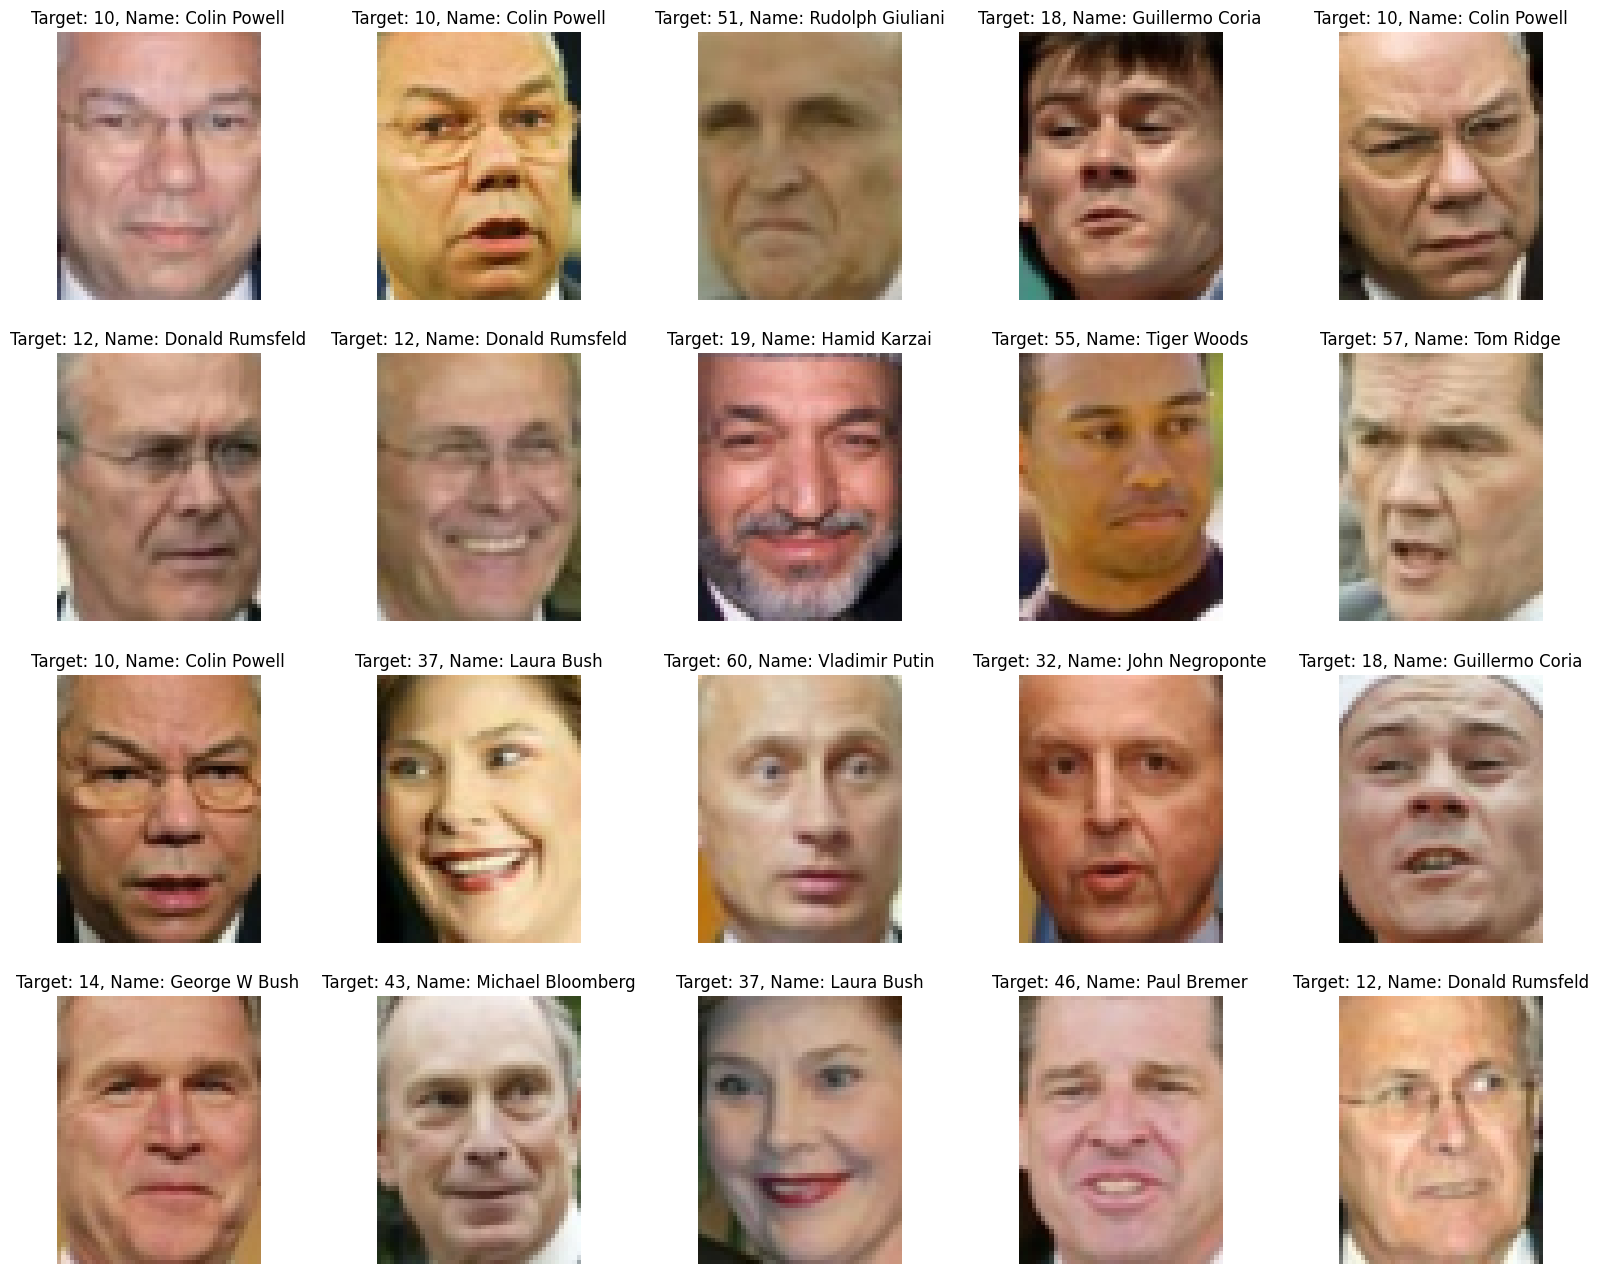

In [9]:
import sqlite3
import matplotlib.pyplot as plt
import pickle
import cv2
import numpy as np
from tqdm import tqdm

# Connect to the SQLite database
conn = sqlite3.connect('/Users/sadhanaanandan/monorepo/Model/lfw_dataset.db')
cursor = conn.cursor()

# Retrieve data from the database
cursor.execute('SELECT target, name, image FROM faces_test')
rows = cursor.fetchall()

# Assuming each row in 'rows' is a tuple (target, name, image_bytes)
def bytes_to_numpy(image_bytes):
    try:
        image = pickle.loads(image_bytes)
        # Ensure the image is a NumPy array with dtype uint8
        image = np.array(image, dtype=np.uint8)
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# Function to display images
def display_images(images, titles, rows, cols):
    plt.figure(figsize=(cols * 4, rows * 4))
    for i in tqdm(range(len(images)), desc="Displaying Images"):
        plt.subplot(rows, cols, i + 1)

        # Check if the image is not empty and has an appropriate depth
        if images[i][0] is not None and images[i][0].dtype == np.float32:
            # Scale the pixel values to the range [0, 1] for float32 images
            displayed_image = images[i][0] / 255.0
            plt.imshow(displayed_image)
        elif images[i][0] is not None and images[i][0].dtype == np.uint8:
            # Directly use Matplotlib's imshow without OpenCV conversion
            plt.imshow(images[i][0])
        else:
            # Handle empty or unsupported depth image case
            plt.imshow(np.zeros((100, 100, 3), dtype=np.uint8))

        plt.title(titles[i])
        plt.axis('off')

        # Print image details for debugging
        #print(f"Image {i+1} - Shape: {images[i][0].shape}, Dtype: {images[i][0].dtype}")

    plt.show()
"""
# Process and display the first 20 images from the dataset
images = []
titles = []
num_images_to_display = 20  # Set the number of images to display

for i, row in enumerate(rows):
    if i >= num_images_to_display:
        break

    target, name, image_bytes = row
    image = bytes_to_numpy(image_bytes)
    images.append((image,))  # Ensure each image is a tuple
    titles.append(f'Target: {target}, Name: {name}')

# Display the first 20 images
display_images(images, titles, rows=4, cols=5)
"""

# Process and display the last 20 images from the dataset
images = []
titles = []
num_images_to_display = 20  # Set the number of images to display

# Start processing from the end of the rows list
for i, row in enumerate(reversed(rows)):
    if i >= num_images_to_display:
        break

    target, name, image_bytes = row
    image = bytes_to_numpy(image_bytes)
    images.append((image,))  # Ensure each image is a tuple
    titles.append(f'Target: {target}, Name: {name}')

# Reverse the order of processed images and titles to maintain the original order
images = images[::-1]
titles = titles[::-1]

# Display the last 20 images
display_images(images, titles, rows=4, cols=5)


# Close the database connection
conn.close()
